**<span style="font-family:Papyrus; font-size:1em;">LOAN  STATUS  PREDICTION</span>** 
** *** **

Group Member: Junyue Wang, Jasmine Wang,Haozheng Wang, Yuzhou Han

# Abstract

Most people choose to apply housing loan to the bank when buying their own houses. After assessing applicants information and background, the bank will provide the result of approval or disapproval. In our project, based on the data set, we are interested in finding the factors that influence the bank's final decision and building a model to predict whether a house loan will be approved or not. 

# Data Clarification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## Data Sets

In our research, we have two data sets, training model set and testing model set. We name them "train", and "test". The train model set contains all independent variables and target variable, which is "Loan_Status". The test model set contains every variable train model set has, except target variable "Loan_Status", since we need to apply the model we get to predict the target variable for test data set.

In [2]:
train=pd.read_csv("train1.csv")
test=pd.read_csv("test1.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In case we have to make changes in our original data sets, we decide to make copies of the original sets so we could always look back and compare. The duplicated data sets are called "train_first" and "test_first".

In [3]:
train_orig=train.copy()
test_orig=test.copy()

## Data Exploration

Specifically, in our train model set, we have 13 variables:
- Loan_ID: Each applicant has an unique Loan ID

- Gender: Applicants' gender: Male/Female

- Married: Applicants' marital status: Yes/No

- Dependents: number of dependents for each applicant

- Education: Applicants' level of education: Graduate/Not Graduate

- Self_Employed: Whether the applicant is self employed or not: Yes/No

- ApplicantIncome: the income of each applicant

- CoapplicantIncome: It gives us the coapplicant's income, but if the applicant does not have a coapplicant, then the number will be 0

- Loan Amount: loan amount in thousands for each applicant

- Loan_Amount_Term: term of loan in months

- Credit_History: 1 for having credit, 0 for not having credit

- Property Area: Applicants' general location: Urban, Semi Urban, and Rural.

- Loan_Status: Did the applicant receive approval or not: Y/N

### Hypothesis

Before analyzing our data, we want to make some hypothesis on which factors will influence applicants' loan status and how. 

* Under our assumption, applicants with graduate degree are more likely to receive approval than those without it. 

* The income of each applicant is also an important factor; applicants with higher income have higher possiblities to be approved.

* If an applicant have excellent or good credit history, he or she is more likely to receive house loan from bank.

* Loan amount and loan amount term also influence bank's decision. Less loan amount and shorter loan amount term will be the preference for the bank 

### Understanding Data

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Like we mentioned before, in our test data set, we have the same variables as in train data set, except the target variable.

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.shape

(614, 13)

In [7]:
test.shape

(367, 12)

After running the "~.shape" command, we could observe that train model set contains 13 columns and 614 observations, and in test model set, it includes 12 columns(without target variable(Loan_Status)) and 367 observations.

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

"~dtypes" commmand gives us format information for each variable. 

The result reveals to us that "Loan_ID", "Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", and "Loan_Status" are categorical variables. 

The integer variables is "ApplicantIncome", and numerical variables include "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", and "Credit_History"

We might change the format of some variables in later sections.

## Data Analysis

### Categorical Variables

**Categorical variables ususally include two or more categories, such as yes or no; male or female; red or blue or green etc.... Each category does not depend on the other nor has certain order involved.**

First, we need to have a basic interpretation towards our target variable "Loan_Status". Among 614 observations in training set, 422 of them, **nearly 68.73%, successfully applied house loan** and 192, and 192 applicants, about **31.27%, did not get bank's approval**.

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

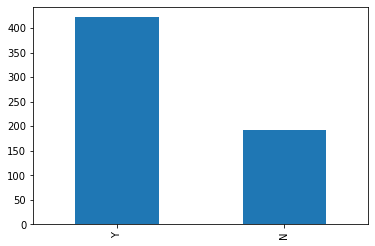

In [10]:
train['Loan_Status'].value_counts().plot.bar()

From the gender plot, we could see that among 614 applicants, **male applicants take nearly 80%, and women take up 20% of total.**

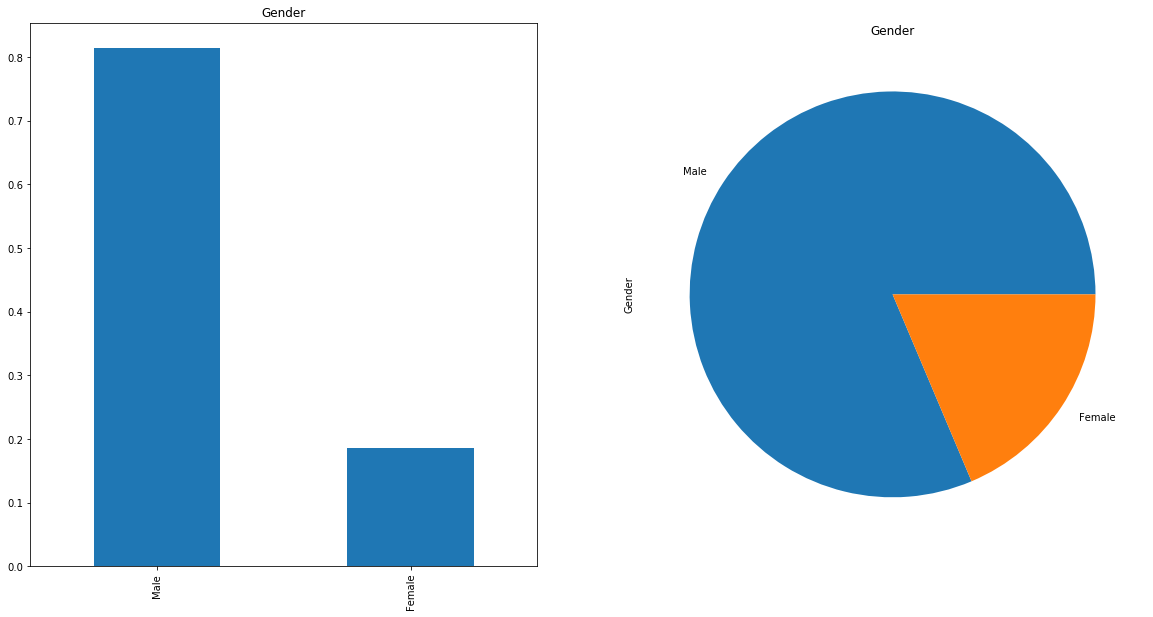

In [11]:
plt.figure(1) 
plt.subplot(121) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender');
plt.subplot(122) 
train['Gender'].value_counts(normalize=True).plot.pie(figsize=(20,10), title= 'Gender');
plt.show()


**Compared with unmarried applicants, married applicants take most part of it.**

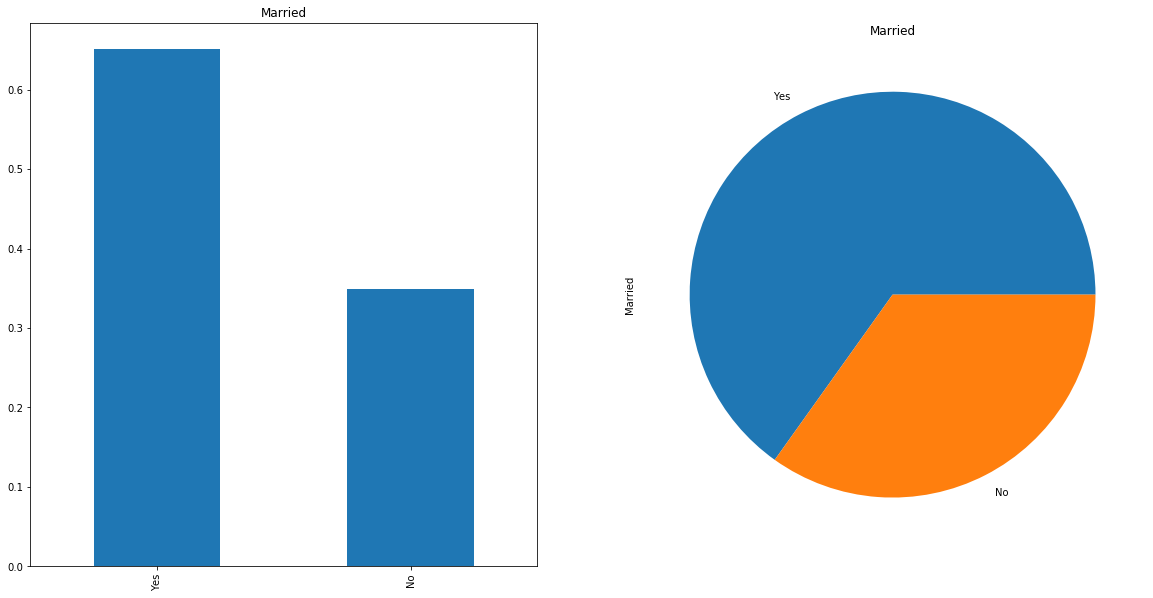

In [12]:
plt.figure(1) 
plt.subplot(121) 
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Married');
plt.subplot(122) 
train['Married'].value_counts(normalize=True).plot.pie(figsize=(20,10), title= 'Married');
plt.show()

**Over 80% of the applicants are not self-employed.**

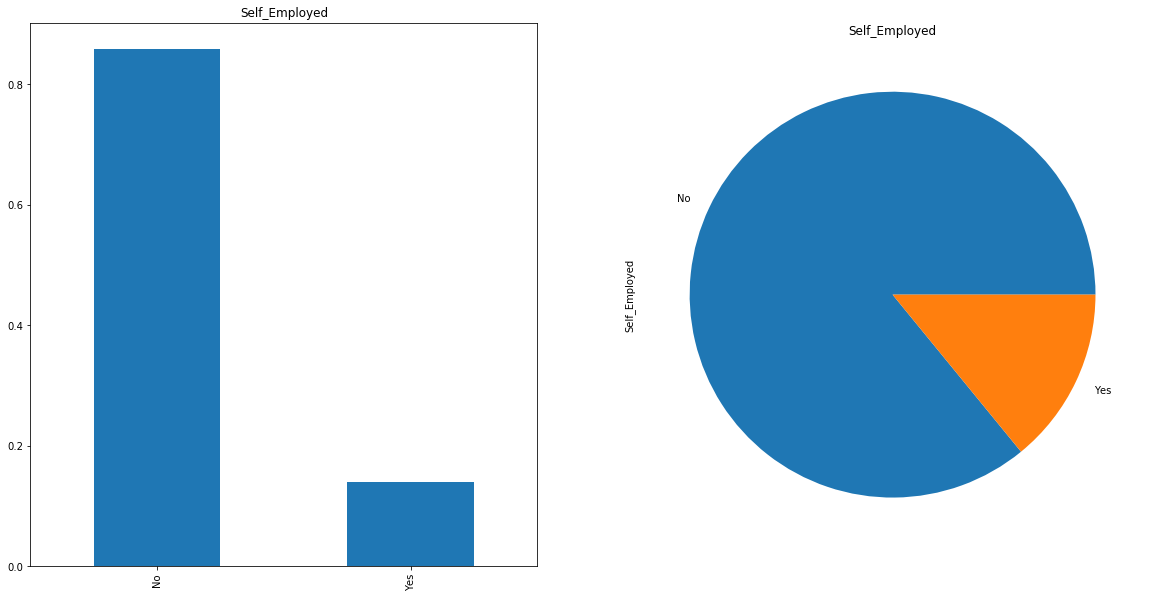

In [13]:
plt.figure(1) 
plt.subplot(121) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Self_Employed');
plt.subplot(122) 
train['Self_Employed'].value_counts(normalize=True).plot.pie(figsize=(20,10), title= 'Self_Employed');


**Most of the applicants have credit_history, and only less than 20% of them do not have credit history.**

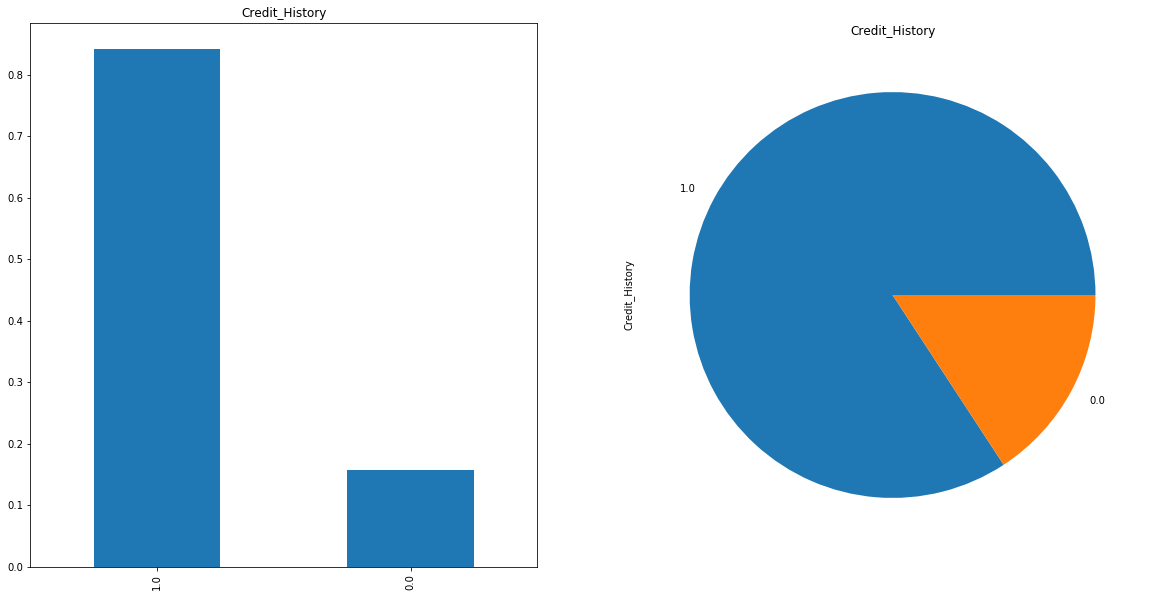

In [14]:
plt.figure(1) 
plt.subplot(121) 
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Credit_History');
plt.subplot(122) 
train['Credit_History'].value_counts(normalize=True).plot.pie(figsize=(20,10), title= 'Credit_History');



### Ordinal Variables

Ordinal variables can be counted as a special format of categorical variables. Instead, ordinal variables **have some order involved**, such as 0,1,2,3; or education level: 1-6 grade, 7-9 grade, 10-12 grade,undergraduate, graduate...

From the dependents plot down below, it is clear to see that **most of the applicants do not have dependents.**

**Applicants with over 3 dependents only take less than 10% of the all.**

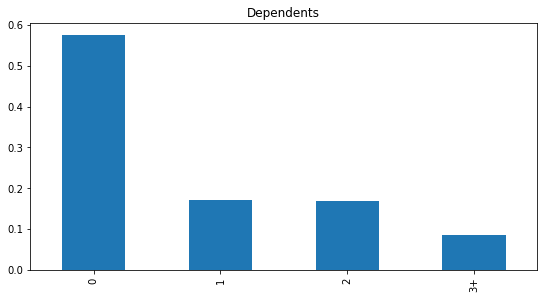

In [15]:
plt.subplot(222)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Dependents')

**Applicants who do not have graduate degrees only occupy $\frac{1}{4}$ of the total applicants.**

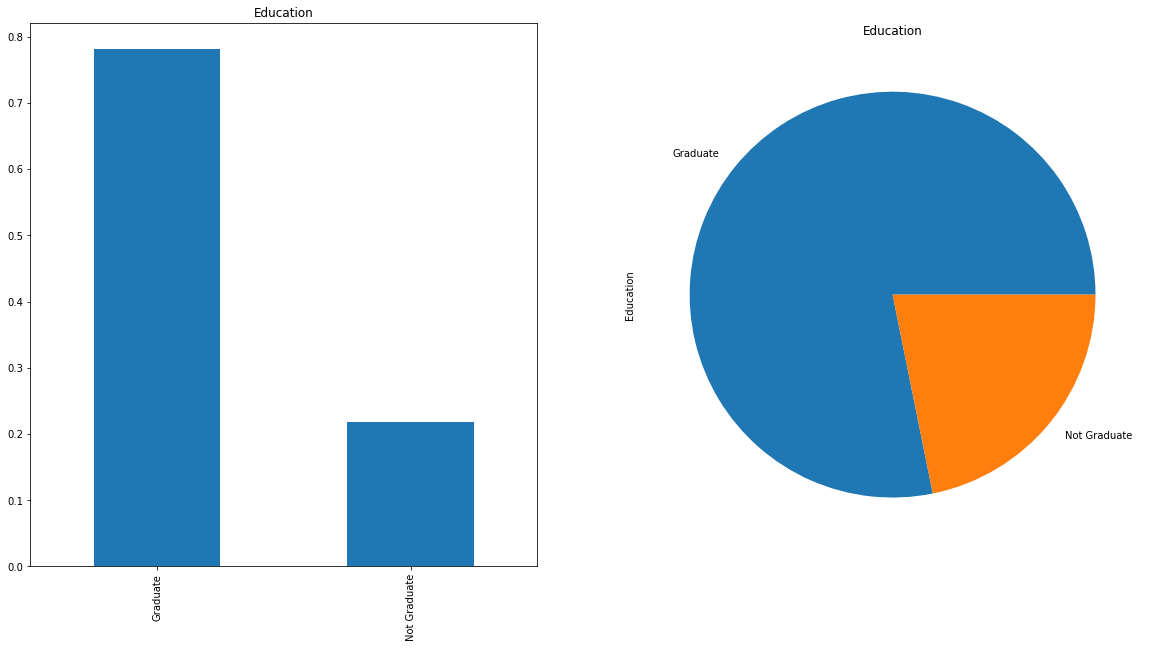

In [16]:
plt.figure(1) 
plt.subplot(121) 
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Education');
plt.subplot(122) 
train['Education'].value_counts(normalize=True).plot.pie(figsize=(20,10), title= 'Education');


Observing the "Property_Area" plot, we can conclude that there only exists slight differences between where the applicants live. **Most of the applicants are from semi urban area, and then is the urban area, and the last is rural area.**

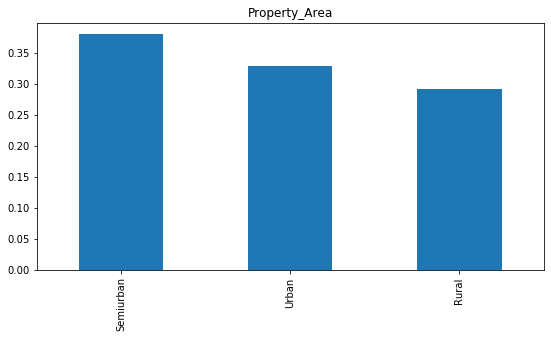

In [17]:
plt.subplot(222)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Property_Area') 

### Numerical Variables

Numerical Variables are variables contain numbers, such as **integer and decimals**.

We first look at variable "ApplicantIncome". From the distribution plot, it is obvious to see that data in "ApplicantIncome" are **not normally distributed**. The distribution is towards left and clearly it is **right-skewed** data. Most of the applicants' income is around $5000 and we have a **heavy tail**. The box plot on the right also conforms our assumption that there exists some **outliers**(applicants with extreme incomes) in our data.

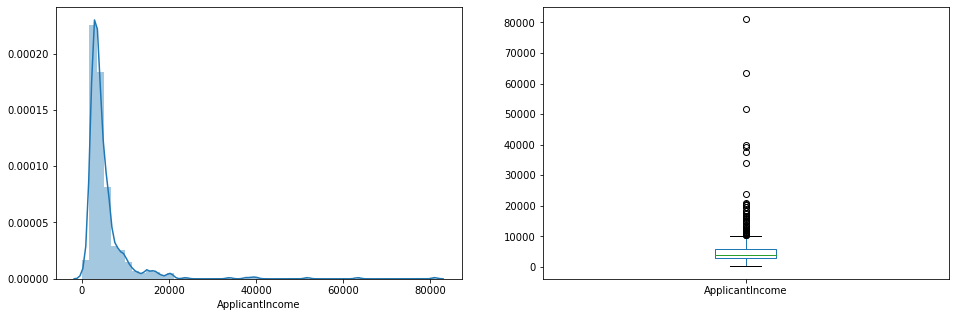

In [18]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'])
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

After confirming our assumption, we want to find out if other variables might influence the existence of outliers in "ApplicantIncome", **such as "Gender", "Married", "Education"**. 

-  Women's average salary in almost every industry(except fashion), is still lower than that of men's. 
-  Married applicants are more likely to have stable economic bases than those who are not married. 
-  Applicants with graduate degrees might also earn more than those without. 

Thus, we want to create boxplots to compare each potencial variable's effect on Applicants' incomes.

Based on the boxplot by "Gender", it confirms our statement that most of the outliers focus on the side of **male**.

Text(0.5, 0.98, '')

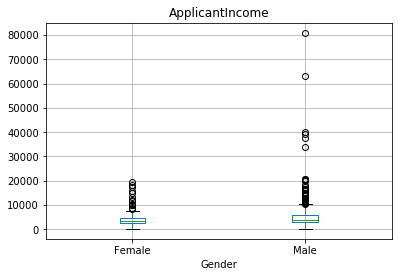

In [19]:
train.boxplot(column='ApplicantIncome', by = 'Gender') 
plt.suptitle("")

From the boxplot by "Married" below, we could observe most of the extreme values are in the **"married"** category.

Text(0.5, 0.98, '')

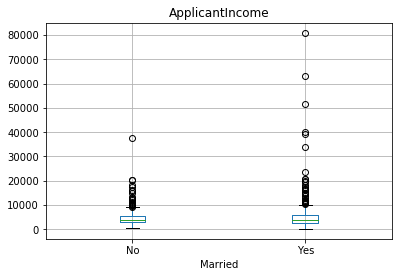

In [20]:
train.boxplot(column='ApplicantIncome', by = 'Married') 
plt.suptitle("")

The "education" boxplot shows even stronger contradiction of applicants' incomes between applicants with and withoue graduate degrees. **In "Graduate" group, we could observe much more outliers and extreme values of income than "Not Graduate" group.** Thus, compared with "Gender" and "Married", **Education level** seems to have **highest effect** on applicants' incomes.

Text(0.5, 0.98, '')

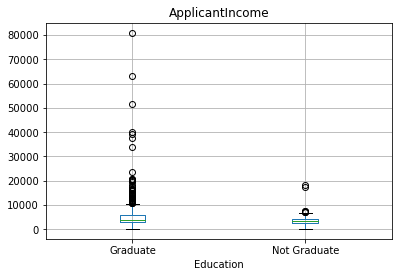

In [21]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

From the distribution plot and boxplot for "CoapplicantIncome", we could see that the data in "CoapplicantIncome" is **not normally distributed** as well, and it also contains **lots of outliers**.

We assume the reason behind is that some of the applicants **do not have coapplicants**, so the "CoapplicantIncome" for these applicants will be **0**. Hence, this could explain why a **large number of 0 shows up in the distribution plot**. Additionally, such high frequency of **0** also affects the boxplot.

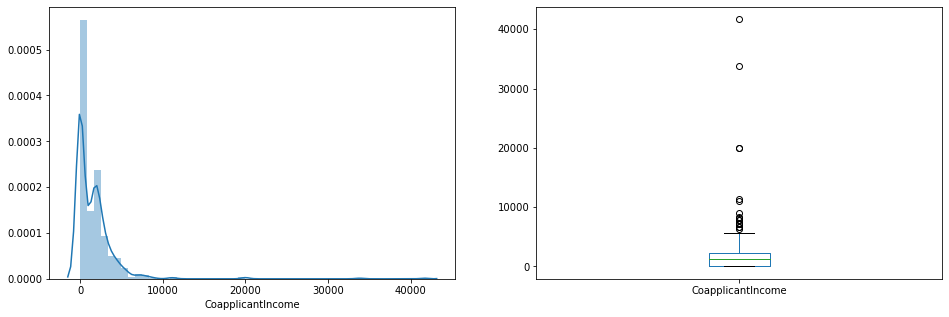

In [22]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

**Note**

When we try to draw the distribution plot and boxplot for "LoanAmount", using the similar method as in "ApplicantIncome" and "CoapplicantIncome" is **not acceptable** (The error term is down below). After analyzing the data set, we observe that variable "LoanAmount" contains some **missing values**. So in order to draw expected plots, we decide to eliminate element with missing value(dropna())

Below is the **wrong attempt**

In [23]:
#plt.figure(1) 
#plt.subplot(121) 
#sns.distplot(train['LoanAmount']); 
#plt.subplot(122) 
#train['LoanAmount'].plot.box(figsize=(16,5)) 
#plt.show()

After drop the missing values, we get our expected plots down below.

We could observe that though there still exists lots of outliers, the distribution for "Loan_Amount" is relatively **normal**.

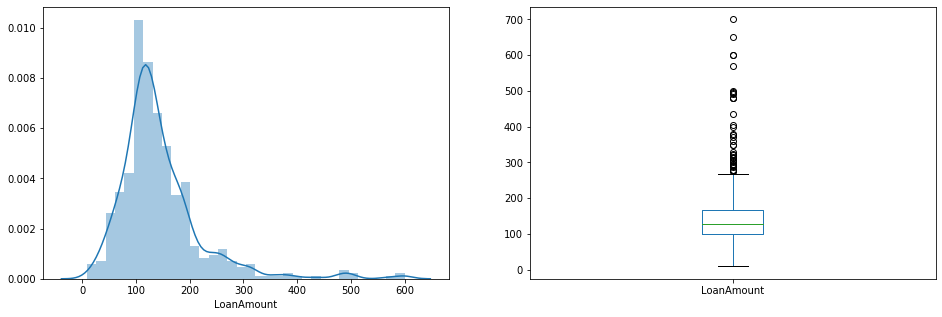

In [24]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

Plotting "Loan_Amount_Term" will not give us any valueable information so we **choose not to visually analyze "Loan_Amount_Term"** in this case.

 ### Bivariate Relationship

After evaluating each variable, we more interested in finding the relationships between target variable "Loan_Status" with every fixed variable, and whether our previous hypothesis is accepted or not.

#### Categorical Variable & Ordinal Variable

Similarly, like previous section, we first start with categorical variables, and we will use **bar plot** to visualize the relation between "Loan_Status" and each categorical variable.

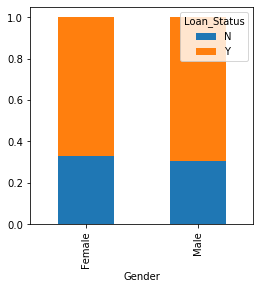

In [25]:
Gender01=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender01.div(Gender01.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));
#Gender01.div(Gender.sum(1).astype(float), axis=0).plot(kind="pie", stacked=True, subplots=True, figsize=(4,4))

From observing the above relation plot of "Gender" and "Loan_Status", we conclude that **Gender does not have significant effect** on deciding applicants' loan status.

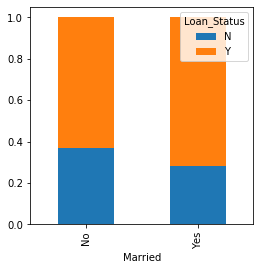

In [26]:
Married01=pd.crosstab(train['Married'],train['Loan_Status']) 
Married01.div(Married01.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

Married applicants are **more likely** to receive bank's approval on house loan.

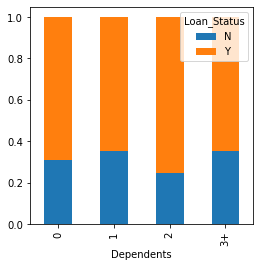

In [27]:
Dependents01=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Dependents01.div(Dependents01.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

Applicants with **0 or 2 dependents have higher possibility** to get approved than those with 1 or 3+ dependents.

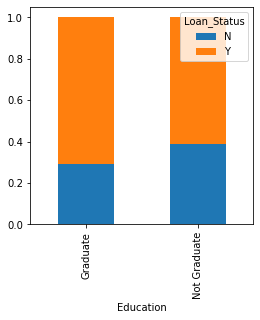

In [28]:
Education01=pd.crosstab(train['Education'],train['Loan_Status']) 
Education01.div(Education01.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

Compared to applicants without graduate degree, applicants with **graduate degree have higher rates** for approval loans

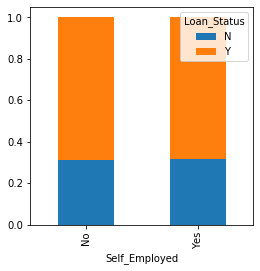

In [29]:
Self_Employed01=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Self_Employed01.div(Self_Employed01.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

Self-Employed basically **does not have any effect** on bank's decision.

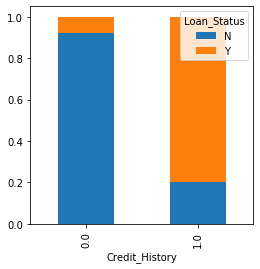

In [30]:
Credit_History01=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Credit_History01.div(Credit_History01.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

It is almost **impossible** for applicants with **no credit history** to receive approval house loan.

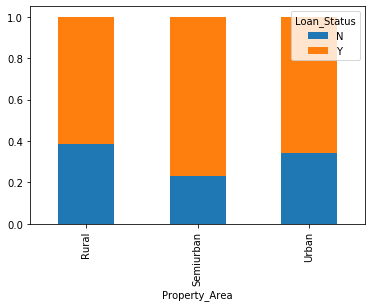

In [31]:
Property_Area01=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Property_Area01.div(Property_Area01.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Compared with applicants from rural or urban area, applying requests of **applicants living in semiurban area are more likely** to be approved.

#### Numerical Variables

First, we want to explore the relationship between applicants' incomes and their loan status. Thus, by **grouping** "Loan_Status"-->Y/N, we get the bar plots for the **mean, median, maximal, and minimal** income for applicants with different result.

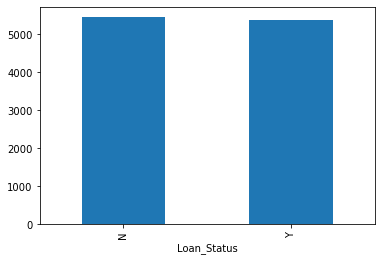

In [32]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

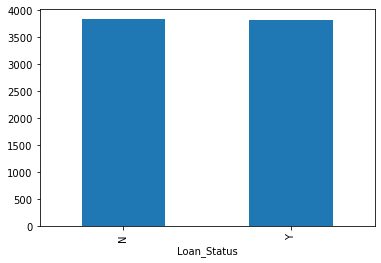

In [33]:
train.groupby('Loan_Status')['ApplicantIncome'].median().plot.bar()
plt.show()

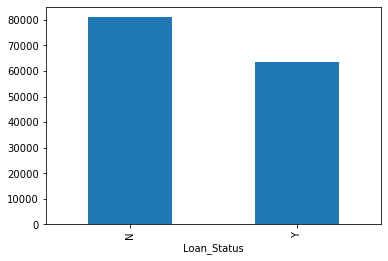

In [34]:
train.groupby('Loan_Status')['ApplicantIncome'].max().plot.bar()
plt.show()

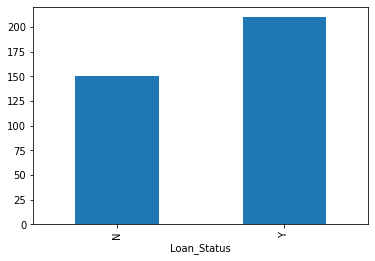

In [35]:
train.groupby('Loan_Status')['ApplicantIncome'].min().plot.bar()
plt.show()

By observing 4 plots above, we conclude that there is basically no difference between mean and median of applicants' incomes. However, applicants whose income is higher than 65,000 dollars are more likely to be rejected! And applicants whose income is lower than 150 dollars are less likely to receive house loan.

- Our guessing is that the bank might evaluate applicants with higher incomes having the ability to buy their houses without other financial support, or the loan amount they required is too big to take risk for.

- For applicants with low incomes, the bank might reject them because they might not be able to pay back their loans.

Since we could not see any difference in mean or median of applicants' income on bank's decision, we decide to separate variable "ApplicantIncome" into several subgroups.

We plan to separate "ApplicantIncome" into 5 groups:
    - Extremely Low: 0-1,500
    - Low: 1500-2500
    - Average: 2500-5000
    - High: 5000-15,000
    - Extremely High: 15,000-810000 (since the max of income in our data set is 81000)

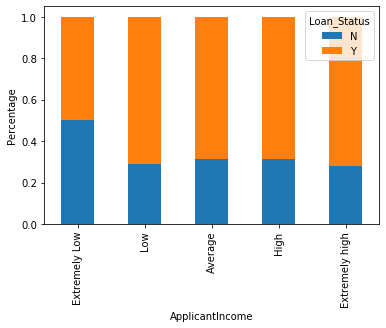

In [36]:
bins=[0,1500,2500,5000,15000,81000] 
group=['Extremely Low','Low','Average','High', 'Extremely high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

In [37]:
train['Income_bin'].value_counts()

Average           315
High              166
Low                96
Extremely high     25
Extremely Low      12
Name: Income_bin, dtype: int64

From the plot above, we observe that except applicants with extremely low income, other levels of income seem not to have significant effect on loan status. Since there are only 12 applicants with extremely low income, their influence could be ignored in general. Thus, we conclude that **applicants' income does not affect the chances of approval**, and this could totally explain why we observe that applicants with income higher than 65,000 dollars are more likely to be denied. 

Therefore, our conclusion **rejects our hypothesis** that applicants with higher income have higher possiblities to be approved

Like we mentioned in section 2.3.3, some of the applicants do not have coapplicants. Thus, when analyzing how coapplicants' income affect approval or disapproval rate, we decide to **add "CoapplicantIncome" and "ApplicantIncome" together** into another variable, and separate the new variable into the 5 same groups as before.

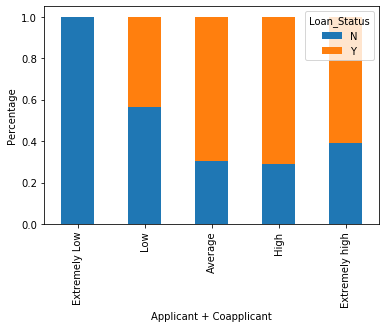

In [38]:
train['Total_coandapply']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,1500,2500,5000,15000,81000] 
group=['Extremely Low','Low','Average','High', 'Extremely high'] 

train['Total_coandapply_bin']=pd.cut(train['Total_coandapply'],bins,labels=group)
Total_coandapply_bin=pd.crosstab(train['Total_coandapply_bin'],train['Loan_Status']) 
Total_coandapply_bin.div(Total_coandapply_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Applicant + Coapplicant') 
P = plt.ylabel('Percentage')

We can see from the plot above, applicants with total income on the level "Extremely Low" are all get denied. Since there is only one applicant satisfies the standard of "Extremly Low", we could ignore his/her influence or put it into the category "Low".

Other than that, the plot reveals to us that **applicants with total income on the level "Low" are much less likely to get approval**, compared with applicants on the level of "Average", "High", and "Extremely High". 

In general, applicants on the level of **"Average" and "High" are most likely** to receive bank's approval.

In [39]:
train['Total_coandapply_bin'].value_counts()

High              308
Average           246
Extremely high     36
Low                23
Extremely Low       1
Name: Total_coandapply_bin, dtype: int64

Similarly, in order to analyze the influence of variable "LoanAmount" on Loan Status, we separate "LoanAmount" into 3 groups:
    - Low: 0-100
    - Average: 100-300
    - High: 300-700 (Since the maximum in "LoanAmount" is 700) 

In [40]:
train['LoanAmount'].max()

700.0

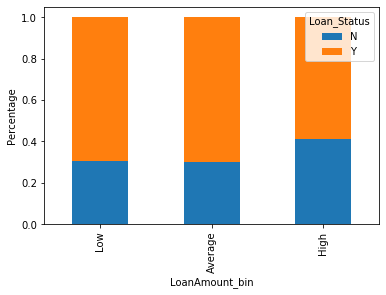

In [41]:
bins=[0,100,300,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount_bin') 
P = plt.ylabel('Percentage')

It turns out that applicants with loan amount higher between **300,000 to 700,000 dollars are more likely to be rejected** than those who applied for less than 300,000 dollars loan.

Therefore, this discovery **confirms our hypothesis** that Less loan amount will be the preference for the bank

For Loan amount term evaluation, we separate the variable into 3 groups:
       - Low: 0-240 
       - Average: 240-360
       - High: 360-480

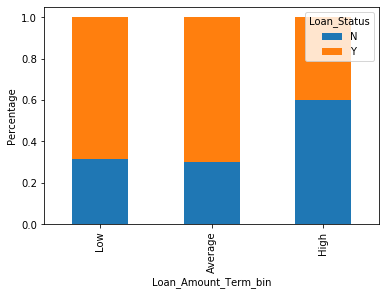

In [42]:
bins=[0,240,360,480] 
group=['Low','Average','High'] 
train['Loan_Amount_Term_bin']=pd.cut(train['Loan_Amount_Term'],bins,labels=group)

Loan_Amount_Term_bin=pd.crosstab(train['Loan_Amount_Term_bin'],train['Loan_Status']) 
Loan_Amount_Term_bin.div(Loan_Amount_Term_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Loan_Amount_Term_bin') 
P = plt.ylabel('Percentage')

The above plot reveals to us that applicants who require **longer loaning length, (over 30 years) are more likely to get rejected** by the bank. 

Hence, this **supports our hypothesis** that Less loan amount term will be the preference for the bank

## Data Cleaning

### Missing Values

From observing our data set, we could see some missing value involved in each variable. In order to make sure our model's performance is stable and expected, we need to fill the missing values using different methods:

* Categorical Variables: exchange missing values into the **mode**.
* Numerical Variables: exchange missing values into **median** 

First, we want to **check** which variables contain missing values by using command **"~.isnull().sum()"**.

In [43]:
train.isnull().sum()

Loan_ID                  0
Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
Property_Area            0
Loan_Status              0
Income_bin               0
Total_coandapply         0
Total_coandapply_bin     0
LoanAmount_bin          22
Loan_Amount_Term_bin    14
dtype: int64

In [44]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

From the summary result above, we observe that variables **"Gender", "Married", "Dependents", "Self-Employed", "LoanAmount", "Loan_Amount_Term", and "Credit_History"** have missing values.

We first start with **filling missing values in categorical variables into the mode**.

In [45]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [46]:
train.isnull().sum()

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History           0
Property_Area            0
Loan_Status              0
Income_bin               0
Total_coandapply         0
Total_coandapply_bin     0
LoanAmount_bin          22
Loan_Amount_Term_bin    14
dtype: int64

In [47]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

Now, we only have numerical variables "LoanAmount" and "Loan_Amount_Term" with missing values.

For variable "LoanAmount", since in section 2.3.3, the boxplot of "LoanAmount" shows a large number of outliers, which will significantly affect the mean, so we use **median** to fill missing values for "LoanAmount".

In [48]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [49]:
train.isnull().sum()

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term        14
Credit_History           0
Property_Area            0
Loan_Status              0
Income_bin               0
Total_coandapply         0
Total_coandapply_bin     0
LoanAmount_bin          22
Loan_Amount_Term_bin    14
dtype: int64

In [50]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [51]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [52]:
train['Loan_Amount_Term'].median()

360.0

In [53]:
test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [54]:
test['Loan_Amount_Term'].median()

360.0

By observing the values of "Loan_Amount_Term", we could see that 360 is the mode and the median of "Loan_Amount_Term. Thus, we impute missing value using **360.0**.

In [55]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

In [56]:
train.isnull().sum()

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
Income_bin               0
Total_coandapply         0
Total_coandapply_bin     0
LoanAmount_bin          22
Loan_Amount_Term_bin    14
dtype: int64

In [57]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

After checking missing values with "~.isnull().sum()" again, we observe that there is **no missing value anymore**.

### Fixing Outliers

Like we mentioned before, variable "Loan Amount" contains many outliers, and the distribution of this variable is not normal. In order to fix this problem, we are going to use **"log transformation"** (knowledge from PSTAT 126) to target right skewness in "Loan Amount" and make it similar to normal distribution.

In [58]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

After using log transformation on "LoanAmount", we want to test the result by drawing a plot:

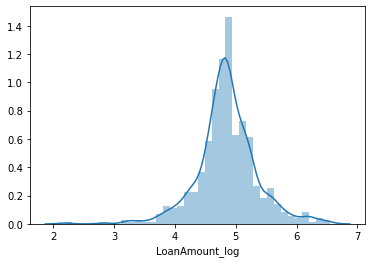

In [59]:
plt.subplot(111) 
sns.distplot(train['LoanAmount_log'])
plt.show()

The distribution looks **much closer to normal** and problem of extreme values has been significantly improved.

We also did log transformation for "ApplicantIncome" but this step is not very necessary.

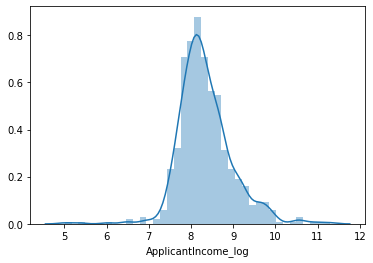

In [60]:
train['ApplicantIncome_log'] = np.log(train['ApplicantIncome'])
test['ApplicantIncome_log'] = np.log(test['ApplicantIncome'])
plt.subplot(111) 
sns.distplot(train['ApplicantIncome_log'])
plt.show()

### General Visualization

Before intepreting general correlation between each variable, we want to make some small changes in variables "Dependents", and "Loan_Status".
* In "Dependents", we decide to change "3+" into "3" to make "Dependents" a numerical variable.
* In "Loan_Status", similarly we change "Yes" into 1 and "No" into 0, which makes it easier for later analysis, especially in the part of **"logistic regression"**.

In [61]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True) 

Next, we remove variables containing "~bin", and other new created variables from our data set

In [62]:
train=train.drop(['Income_bin',  'LoanAmount_bin', 'Total_coandapply_bin', 'Total_coandapply','Loan_Amount_Term_bin',], axis=1)

In [63]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680,7.972466
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389,8.996157
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109,8.933664


In [64]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,8.031385
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,8.517193
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,7.757906
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,8.094378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388,8.296297
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932,8.332789
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282,8.086410
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595,8.517193


We then create a data set **exclude** "LoanAmount_log", and "ApplicantIncome_log".

In [65]:
train_cor=train.drop(["LoanAmount_log", "ApplicantIncome_log"],axis=1)

In [66]:
train_cor.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In the end, we use **heatmap** to visualize the correation between numerical variables

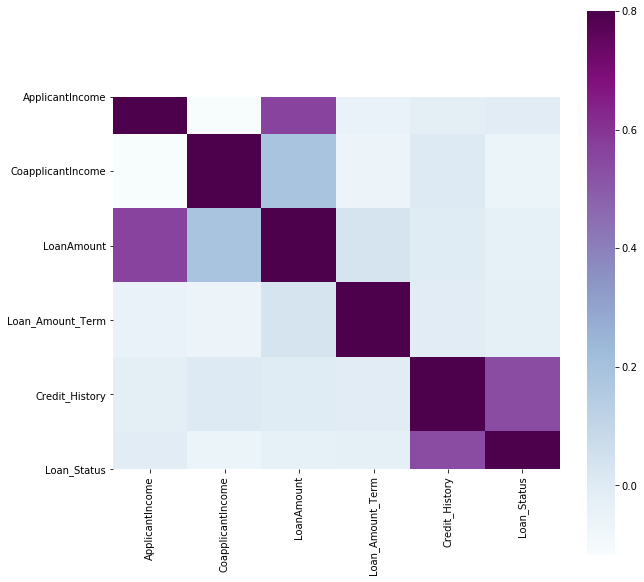

In [67]:
matrix = train_cor.corr() 
f, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu");

According to the Plot above, we can conclude that there is strong correlation between **Loan_Amount** and **ApplicantIncome** and between **Credit_History** and **Loan_Status**

# Model Building: Part I

## Build the Model

After analyzing the dataset we had, we are interested in constructing a model to predict the loan status. There are multiple tools we can utilize such as the linear regression or survival analysis. But survival analysis requires time to event data and it is not appropriate here. And linear regression is unbounded. 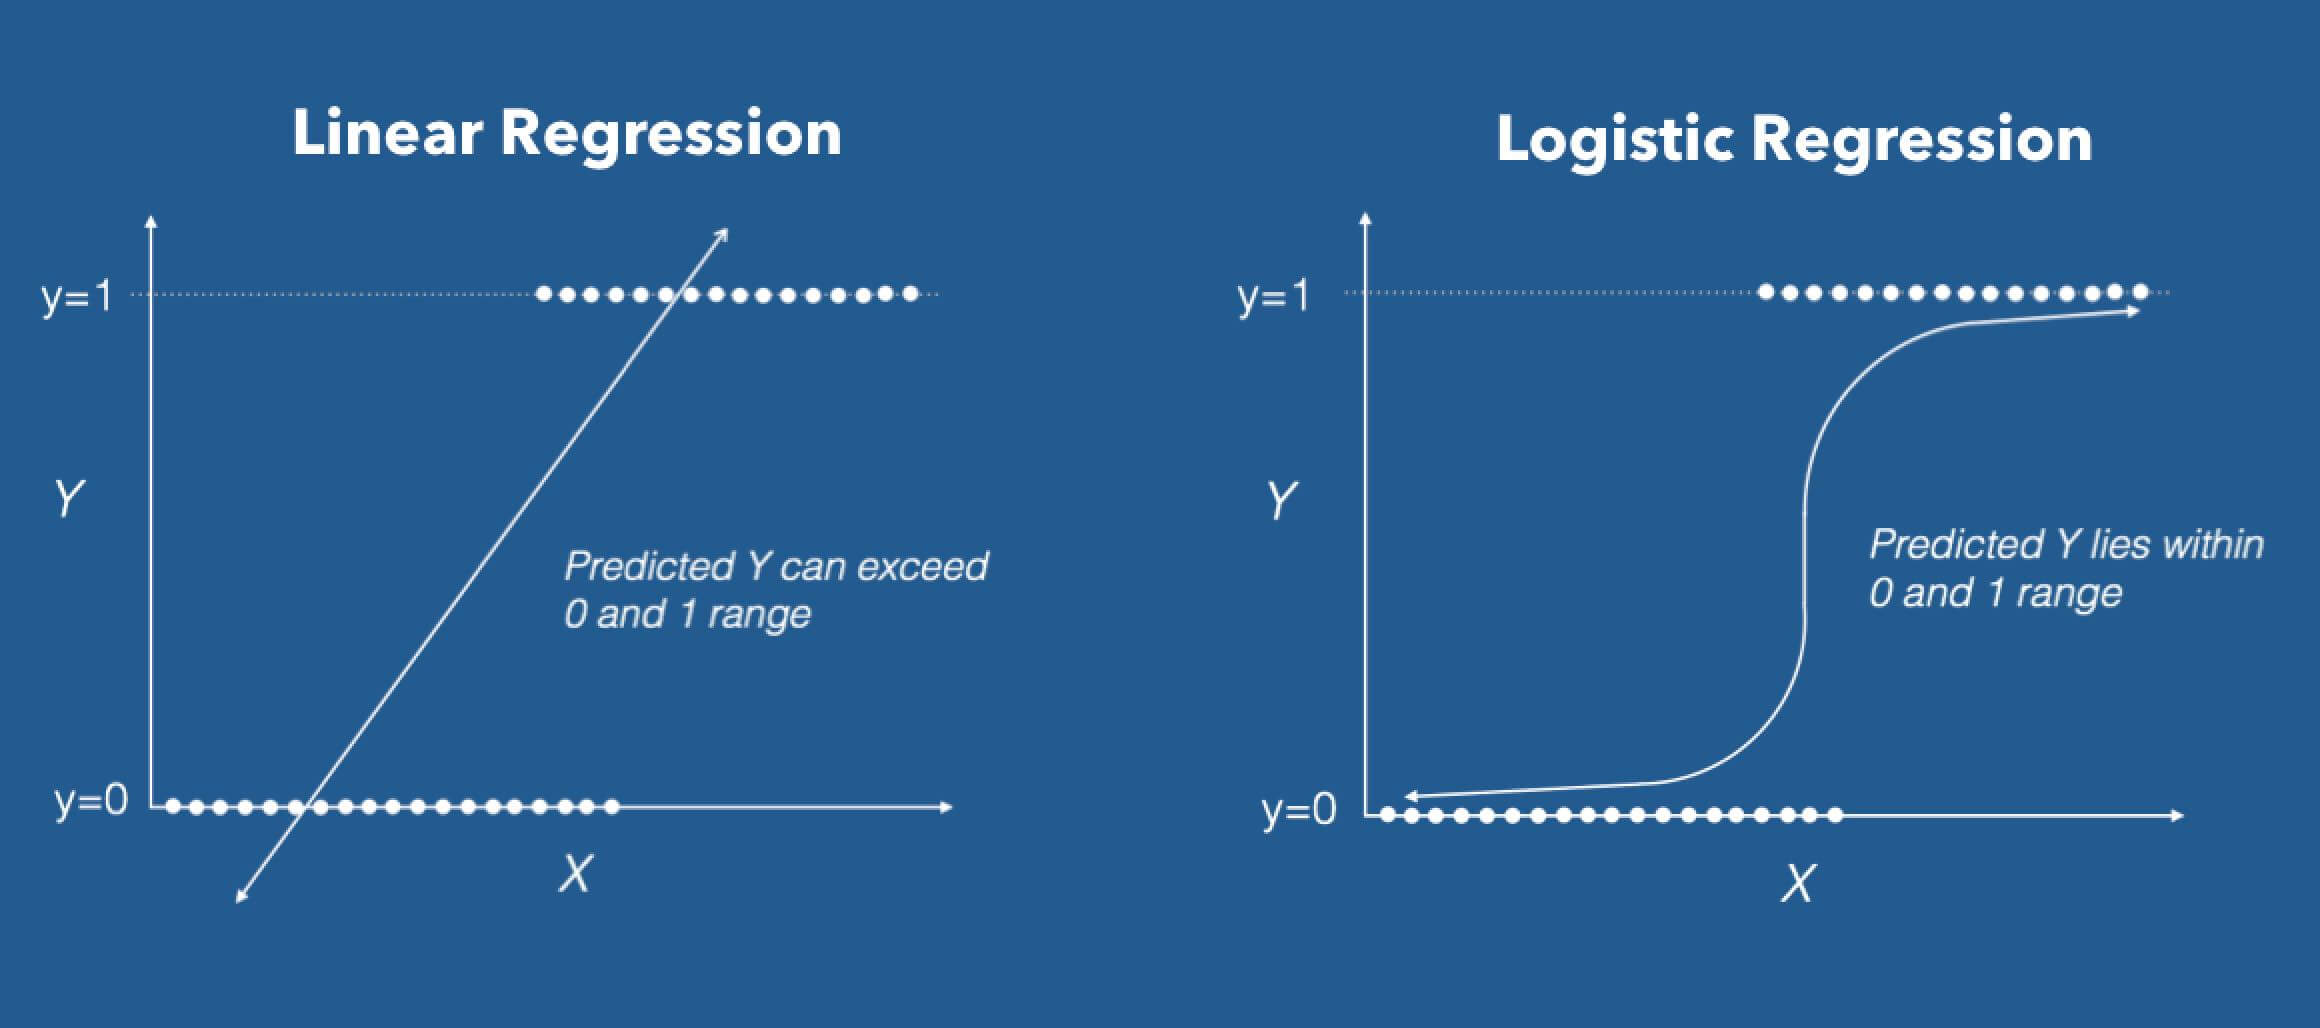





After researching for useful method, the best tool here is logistic regression since it works best for binary classification data (ie.only two outcomes for target variable). We will expand the theory as follow:

$$ Sigmoid Function $$
$$\frac{1}{1+e^{-x}}$$

As the x goes to infinity, the function approximate 1. And x goes to negative infinity, the value will approximate 0. It is therefore a good estimate of how possibly can the predicted value be the actual output when given input x.

First we check for potential variables before we build up the model. It is apparently that "Loan_ID" will not affect "loan status" and therefore we drop this column from both train and test dataset. 

In [68]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)
train=train.drop('ApplicantIncome_log',axis=1) 
test=test.drop('ApplicantIncome_log',axis=1)

In [69]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [70]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,5.231109


Since we want to generate a mathematical prediction, we would better have numerical values to represent different categories within each object variables beacuase logistic regression takes only the numerical values as input. For example, we observe that Gender has two layers "Male" & "Female" Married has two layers "Yes" & "No". Instead of making changes to every single variable, we apply  𝑝𝑑.𝑔𝑒𝑡 _ 𝑑𝑢𝑚𝑚𝑖𝑒𝑠()  function to the dataset.

In [71]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [72]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


Like what we had so far in Statistics study, we always pre-check the ideal model with P-value and other criterias. Here we have generated the summary table of the statistical facts.

In [73]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.453953
         Iterations 11
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.269     
Dependent Variable:         Loan_Status              AIC:                      589.4541  
Date:                       2019-12-11 18:36         BIC:                      660.1740  
No. Observations:           614                      Log-Likelihood:           -278.73   
Df Model:                   15                       LL-Null:                  -381.45   
Df Residuals:               598                      LLR p-value:              1.6657e-35
Converged:                  1.0000                   Scale:                    1.0000    
No. Iterations:             11.0000                                                      
-----------------------------------------------------------------------------------------
                         Coef.     

We can see that $Credit$_$ History$ has a P-value approximately 0. Except for that, every other variable has a P-value greater than 0.05, which indicates that none of them are significant. Surprisingly, the results correspond closely to previous the conclusion from heatedmap graph that $Credit$_$ History$ might the only variable who has significant effect on $Loan$_$ Status$

The basic task here is to predict a model based on train dataset and then apply it for test dataset to test its correctness. Before we apply the prediction on test dataset, it is always good to confirm the prediction first on validation dataset, which is independent of the train dataset, to avoid overfitting. By saying that, if the model is simply generated with train data, it is very likely to get 100% accuracy and overfit. Each with different purpose, validation set is used for tuning the parameters of a model but test set is used for performance evaluation. Here, we try to re-sample the dataset with SMOTE function.

In [74]:
!pip install imblearn

In [75]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Loan_Status'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of approved loan in oversampled data",len(os_data_y[os_data_y['Loan_Status']==1]))
print("Number of not approved loan",len(os_data_y[os_data_y['Loan_Status']==0]))
print("Proportion of not approved loan data in oversampled data is ",len(os_data_y[os_data_y['Loan_Status']==0])/len(os_data_X))
print("Proportion of approved loan data in oversampled data is ",len(os_data_y[os_data_y['Loan_Status']==1])/len(os_data_X))

length of oversampled data is  664
Number of approved loan in oversampled data 332
Number of not approved loan 332
Proportion of not approved loan data in oversampled data is  0.5
Proportion of approved loan data in oversampled data is  0.5


It is important to validate the model first and the re-sampling here guarantees that we could validate our predicted model without making use of the test dataset. This will help in gauging the effectiveness of your model’s performance.

In [76]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
result=model.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          
                   intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,          
                   penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          
                   verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization. We tested multiple time and we found C value will not really affect the result.

## Prediction and Checking the Accuracy

In [77]:
y_pred1 = model.predict(X_test)
mean1 = accuracy_score(y_test,y_pred1)
print(mean1)

0.8373983739837398


For the model we generated above, the accuracy is measured to be 0.84, which means almost 84% of the predictions according to logistics regression model match the true result. After the model building, the evaluation of model's performance should be displayed for quality monitor. Next, We will illustrate the concepts with confusion matrix. 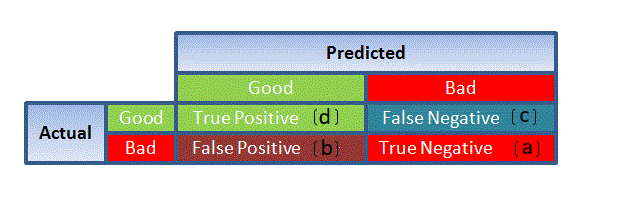

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[15 18]
 [ 2 88]]


The matrix above corresponds to $TP$ $FN$ $FP$ $TN$ parts in the graph. From the definition of Accuracy $\frac{TP+TN}{TP+FN+FP+TN}$ , how much of the true predictions were made, we can calculate the accuracy to be : $\frac{15+88}{15+18+2+88}= 0.84$

Some other measurements of a predicted model are explained and listed below. However, all of them can be calculated based on the definition and confusion matrix above. Here we used a faster report to show them all.

The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The recall is intuitively the ability of the classifier to find all the positive samples.

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



Besides the mathematical fact, we can visualize the performace with ROC curve. 

### Definition of ROC curve
ROC curve Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity).
The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

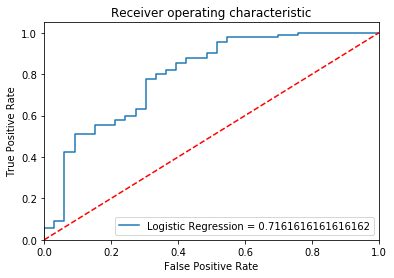

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
auc = metrics.roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression = '+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

As illustrated above, the area under the curve represents how much the model fits the dataset. Concluded from the plot, the model is quite robust in this way. But still, we are looking for ways to improve it.

### stratified k-fold cross validation

Now that we created a validation set to make sure the correctness of our model, we now want to explore more methods to double check the result. These useful tools include stratified k-fold cross validation and Leave one out cross validation (LOOCV). Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances. According to $Kohavi$ (A study of cross-validation and bootstrap for accuracy estimation and model selection) , stratification is generally a better scheme, both in terms of bias and variance, when compared to regular cross-validation.Therefore we want to expand Stratified K-fold cross validation here, both its theory and usage.

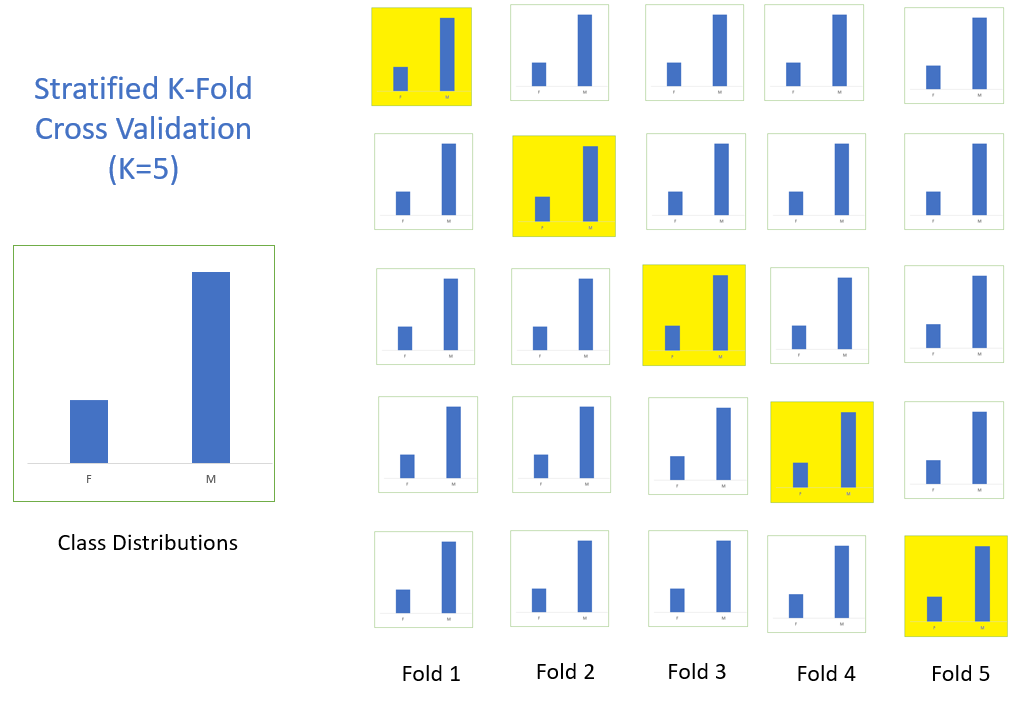

**Advantage of using cross validation**

✔Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.

✔For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.

✔It is generally a better approach when dealing with both bias and variance.

✔A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.

The conclusion, in our own words,We divide our train dataset into 5 folders, so each of the folders have the same amount of data. Then, in each folder, we are going to divide all data into 5 groups again. After that, in the first folder, we use the second group to the fifth group to train the model and use the first group to test the model. In the second folder, a little bit different, we use the first group and the third to fifth group to train the model, and then, use the second group to test the model. Then, we repeat the process until the last folder, where we use group number 5 to test the model. Finally, we just print out the result, which are the 5 values of accuracy of the model.

# Model Building: Part II

## Feature Engineering

Thinking about the Independent Variables, we can come up with some new features that combine the original vriables. Those new features may significantly affect the target Variable, which is "Loan_Status".

With the Carefully considering, we finally create 3 new features shown below:
- **Total Income**: The total income is the combination of Applicant Income and Coapplicant Income. With the higher total income, the applicants might have higher possibility to get the loan approved.



- **Equated Monthly Installment (EMI)**: EMI is a fixed payment amount made by a borrower to a lender at a specified date each calendar month. With a higher EMI, the bank will be more likely to reject the loan request of applicants, because the applicants who have high EMI might be more difficult to pay back the loan each month. We can calculate the EMI by dividing the loan amount by loan amount term.



- **Balance Income**: This factor represents the borrower's income after paying the EMI. Our assumption is that with the higher balance income, the person is more eligible for repaying the loan and thus increase the probability of loan
approval.

In [81]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

We take a look at the distributions of these three new features.

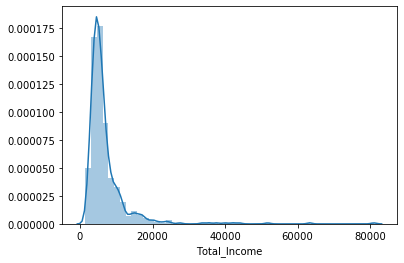

In [82]:
sns.distplot(train['Total_Income'])
plt.show()

We observed that the distribution of total income is right skewed, so we consider on a log transformation.

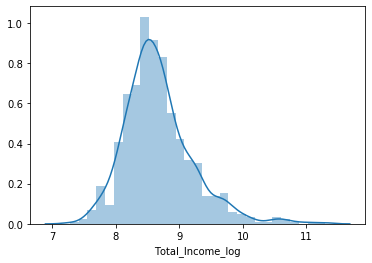

In [83]:
train['Total_Income_log']=np.log(train['Total_Income'])
test['Total_Income_log']=np.log(test['Total_Income'])
sns.distplot(train['Total_Income_log'])
plt.show()

In [84]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

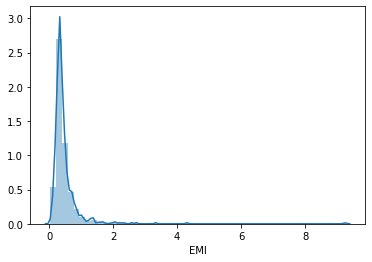

In [85]:
sns.distplot(train['EMI'])
plt.show()

In [86]:
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000) 
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)

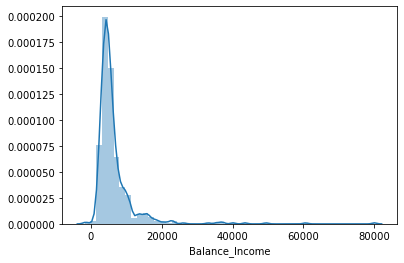

In [87]:
sns.distplot(train['Balance_Income'])
plt.show()

In [88]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,...,0,1,0,1,0,0,2900.0,7.972466,0.197222,2702.777778
610,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,...,0,1,0,1,0,0,4106.0,8.320205,0.222222,3883.777778
611,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,...,0,1,0,0,0,1,8312.0,9.025456,0.702778,7609.222222
612,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,...,0,1,0,0,0,1,7583.0,8.933664,0.519444,7063.555556


In the next following step, we decide to drop the variables that are involved to create the new three features. For logistic regression, we assume that variables are not highly connected to reduce the influence of noise. Thus, we dropped 'Applicant Income', 'CoapplicantIncome', 'Loan Amount' and 'Loan Amount Term' in both train and test datasets.

In [89]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

Again, we drop the unrelated variable 'Loan Id' and save the target response in a separate dataset at the beginning.

## Logistic Regression

In the next step, we use the logistic regression together with the application of KfoldStratified model. Then, we might construct our models by other more complex models and compare their results at the end.


In [90]:
from sklearn.model_selection import StratifiedKFold

In [91]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
total = 0
for indexa,indexb in kf.split(train,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtrain,xval = X.loc[indexa],X.loc[indexb]     
    ytrain,yval = y[indexa],y[indexb]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtrain, ytrain)     
    pred_test = model.predict(xval)     
    score = accuracy_score(yval,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    total = total + score
mean2 = total/(i-1)
print("\n Mean accuracy score" , mean2)


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147

 Mean accuracy score 0.8012928162068507


Use the k-fold stratification method, we could obtain the mean validation accuracy.

The mean validation accuracy for this model is 0.801. Nevertheless, compared with our original model I, the validation accuracy actually decreases. So, we need to construct other models to determine if these three new features are important for our prediction.

## Decision Tree

Besides logistic regression, we decide to construct a Decision Tree Model, which is one kind of supervised algorithm with a pre-defined target variable. To construct a Decision Tree Model, we need to split the sample into several identical subsets based on the most crucial differentiator in the variables. What's more, a decision tree model would split in two or more sub-nodes, which also indicates that the more sub-nodes are created, the higher the homogenity of resultant sub-node maintains.

In [92]:
from sklearn import tree
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
total = 0
for train_index,test_index in kf.split(train,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    total = total + score
mean3=total/(i-1)

print('\nMean accuracy_score', mean3)



1 of kfold 5
accuracy_score 0.6991869918699187

2 of kfold 5
accuracy_score 0.7398373983739838

3 of kfold 5
accuracy_score 0.7154471544715447

4 of kfold 5
accuracy_score 0.7235772357723578

5 of kfold 5
accuracy_score 0.6721311475409836

Mean accuracy_score 0.7100359856057576


In the decision tree model, the mean validation accuracy is 0.7100, which is even lower than the mean of the decision tree model. Consequently, we need to look for another model. 

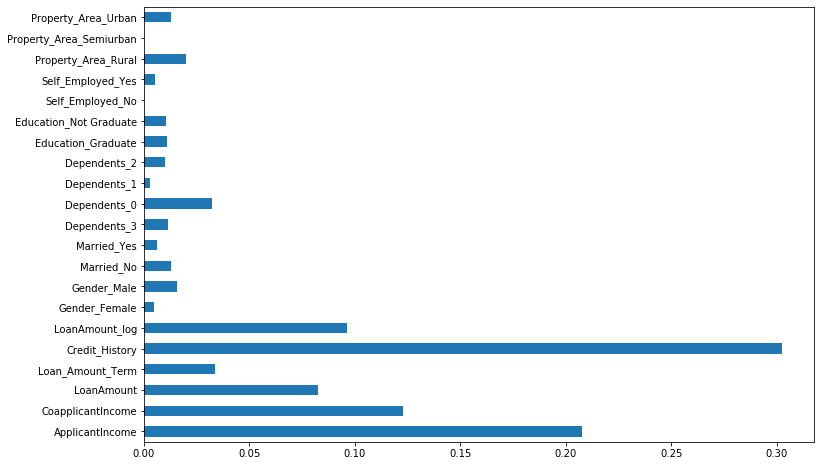

In [93]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.show()

In the importance graph above, we could clearly observe that the influence of Balance Income, EMI, and Total Income are much more crucial than other variables. 

## Random Forest

Basically, Random Forest method is a tree based bootstrapping algorithm combining a certain amount of decision tree models to make a more precise and convincing prediction model. 

In [94]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
total = 0
for train_index,test_index in kf.split(train,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    total = total + score
    
mean4=total/(i-1)
print('\nMean accuracy_score', mean4)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7540983606557377

Mean accuracy_score 0.8044782087165135


Obviously, the mean validation accuracy increases to 0.8045, which is very close to the original model. But we still need to improve the accuracy by the method of grid searching to find the optimized values of hyper parameters. 
In general, grid search is a way to filter out the best one of a family of hyper parameters. 
To achieve this goal, we will tune the max_depth, which determine the depth of the tree, and n_estimators, which decides the number of trees in random forest model. 

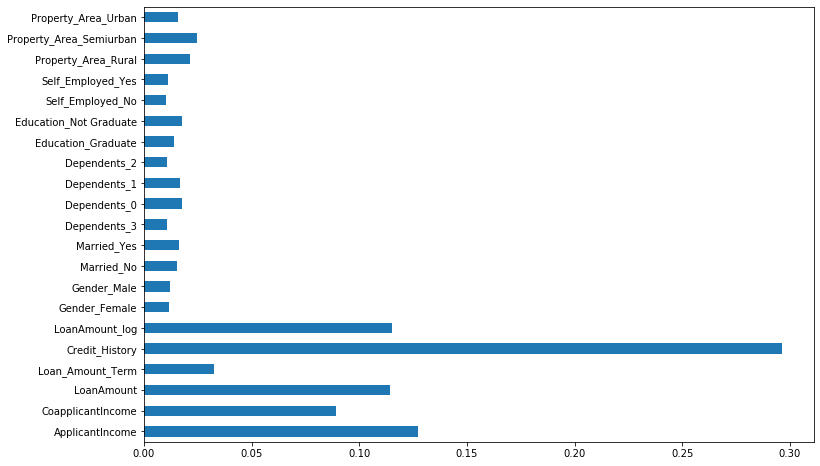

In [95]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.show()

Again, in this importance graph, with credit history as the most indispensable factor, the three new features still play dramatic influences on the prediction model.

## XGBOOST

XGBoost is a fast and efficient algorithm, which works only with numeric variables. And we have already replaced the categorical variables with numeric variables. Again, we have max_depth, which determine the depth of the tree, and n_estimators, which decides the number of trees in random forest model. 

In [96]:
!pip install xgboost

In [97]:
from xgboost import XGBClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
total=0
for train_index,test_index in kf.split(train,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    total = total + score
mean5=total/(i-1)
print('\nMean accuracy_score', mean5)    


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.8032786885245902

Mean accuracy_score 0.8029321604691457


Now, we got an mean validation accuracy as 0.803, which is relative high compared with other models. We are also going to draw an importance graph. 

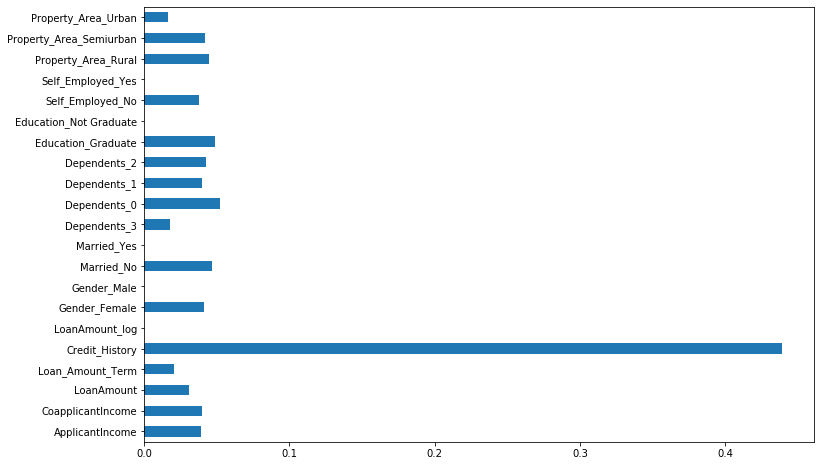

In [98]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.show()

However, in the XGBOOST model, the importance of the new three features and other variables are much smaller than other models. Thus, we decide to not apply this model in our final conclusion. 

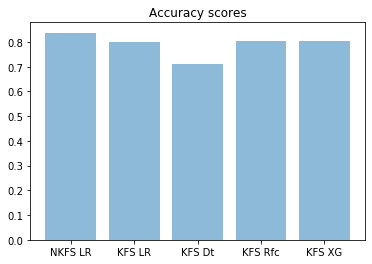

In [99]:
objects = ("NKFS LR" , "KFS LR","KFS Dt","KFS Rfc","KFS XG")
ypos = np.arange(len(objects))
performance = (mean1,mean2,mean3,mean4,mean5)
plt.bar(ypos,performance,align = "center",alpha=0.5)
plt.xticks(ypos,objects)
plt.title("Accuracy scores")
plt.show()

From the barplot, Non-stratified Logistic Regression has the best predicted performance with unchanged train data. Therefore we would apply this method on an external test tool to substantiate the "Loan_Status" results. 

In [100]:
model = LogisticRegression()
result=model.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          
                   intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,          
                   penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          
                   verbose=0, warm_start=False)
pred_test = model.predict(test)
submission=pd.read_csv("sample1.csv")
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_orig['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

From the external system, we confirm the LogisticRegression Model on test data. The accuracy we got here was around 0.78 which means this model performed pretty well considering its limited train and validation size. 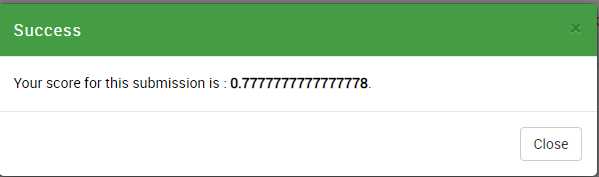

# Conclusion 

In summarization, our research project includes total 6 parts: 


1.Hypothesis statement: 

* Under our assumption, applicants with graduate degree are more likely to receive approval than those without it. 

* The income of each applicant is also an important factor; applicants with higher income have higher possiblities to be approved.

* If an applicant have excellent or good credit history, he or she is more likely to receive house loan from bank.

* Loan amount and loan amount term also influence bank's decision. Less loan amount and shorter loan amount term will be the preference for the bank 
2.Visualization the variable and the target variable by the method of bivariate analysis
3.Cleaning the data and Deleting the outliers 
4.Build logistic regression model 1 by stratified k-fold cross validation
5.Add three new features 
6.Construct model 2 based on the the new variables and compare differnt models

For the part 1 and part 2, our conclusions are:
* Yes, graduate students are more likely to receive approval than those without graduate degree.
* Based on the plots, we conclude that there is basically no difference between mean and median of applicants' incomes. However, applicants whose income is higher than 65,000 dollars are more likely to be rejected! And applicants whose income is lower than 150 dollars are less likely to receive house loan.
* Yes, the applicant with excellent credit history would have much higher chances to receive approval. 
* Yes, less loan amount and loan amount term will be more potential to get approval.

While constructing the model I, we consider applying the Logistic Regression for its suitability with  binary classification data and SigmoidFunction. And after constructing the model I, we used ROC curves and prediction matrix to see its performances. The testing model implies that logistic regression model works pretty well but we still could improve it. Accordingly, we find k-fold stratification to improve the model I.

For the modeling part II, with the application of k-fold stratification to divide the dataset, then we considered total four modeling methods:logistic regression, decision tree, random forest and XGBOOST to see the importance of three new feartures in the prediction model. And among these four models, the non-stratifided Logistic Regression model has the best performance for prediction.  

Now, our conclusion considering the comparision between the model 1 with original features and model 2 with added features is that the new three features: EMI, Total Income and Balance income indeed have crucial infuences on the prediction model based on the importance graph of differnt model building approaches above. And among all these factors, credit_history is always the most indispensable factor for the prediction model. 